In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-07 00:54:38.395281


In [2]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [3]:
import albumentations as A
import torchvision.transforms as transforms
import torch
from PIL import Image
from albumentations.pytorch import ToTensor
from plot_graph import plot_images, plot_graph
from utils import *

In [4]:
## importing and transforming data
from read_inputs import read_transform_inputs
trainset, trainloader, testset, testloader, classes = read_transform_inputs()

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 deer   cat truck   cat


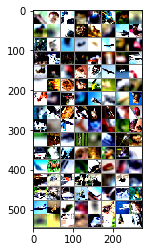

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
## defining model

from define_model import ResNet
from define_model import BasicBlock
from define_model import Bottleneck
!pip install torchsummary
from torchsummary import summary
from quiz_dnn import QuizDNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = QuizDNN()
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [7]:

##defining optimiser
from define_optim import optim_define
optimizer = optim_define(model)

In [8]:
## defining accuracy check and defining the training class
from truth_checker import truth_checker
from training_class import training_class
clf = training_class(model=model,trainloader = trainloader,testloader= testloader,device=device,
                     epoch=5,optimizer=optimizer)

In [9]:
from train import train
from test import test
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

epochs = 40
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.1, epochs=epochs,
                       steps_per_epoch=len(trainloader))

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(epochs):
      print("EPOCH:", epoch+1)
      train(model, device, trainloader, criterion, optimizer, epoch, l1_decay, l2_decay, scheduler)
      test(model, device, testloader, criterion, classes, test_losses, test_accs,
           misclassified_imgs, correct_imgs, epoch==epochs-1)
  return test_losses, test_accs, misclassified_imgs, correct_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs, correct_imgs = run(l1_decay=3e-6, l2_decay=1e-3)

EPOCH: 1
L2_loss=116.71858215332031 L1_loss=6963.19775390625 Loss=1.9830944538116455 Batch_id=390 Accuracy=29.85: 100%|██████████| 391/391 [00:23<00:00, 16.87it/s]
Test set: Average loss: 0.0130, Accuracy: 3997/10000 (39.97%)

EPOCH: 2
L2_loss=119.00556945800781 L1_loss=7128.68408203125 Loss=1.692690134048462 Batch_id=390 Accuracy=36.97: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
Test set: Average loss: 0.0114, Accuracy: 4715/10000 (47.15%)

EPOCH: 3
L2_loss=123.08746337890625 L1_loss=7514.2451171875 Loss=1.634868860244751 Batch_id=390 Accuracy=41.17: 100%|██████████| 391/391 [00:24<00:00, 15.96it/s]
Test set: Average loss: 0.0123, Accuracy: 4376/10000 (43.76%)

EPOCH: 4
L2_loss=128.5358428955078 L1_loss=8139.693359375 Loss=1.7131400108337402 Batch_id=390 Accuracy=43.82: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]
Test set: Average loss: 0.0099, Accuracy: 5525/10000 (55.25%)

EPOCH: 5
L2_loss=134.8004608154297 L1_loss=8932.732421875 Loss=1.4723693132400513 Batch_id=390 Acc

In [16]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-07 01:13:49.572952


In [17]:
PATH = 'model_quiz.sav'
torch.save(model.state_dict(), PATH)

#model = TheModelClass(*args, **kwargs)
#model.load_state_dict(torch.load(PATH))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
GroundTruth:    cat  ship  ship plane


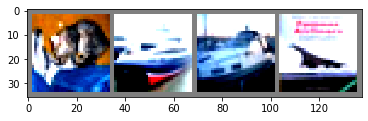

In [18]:

## checking test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


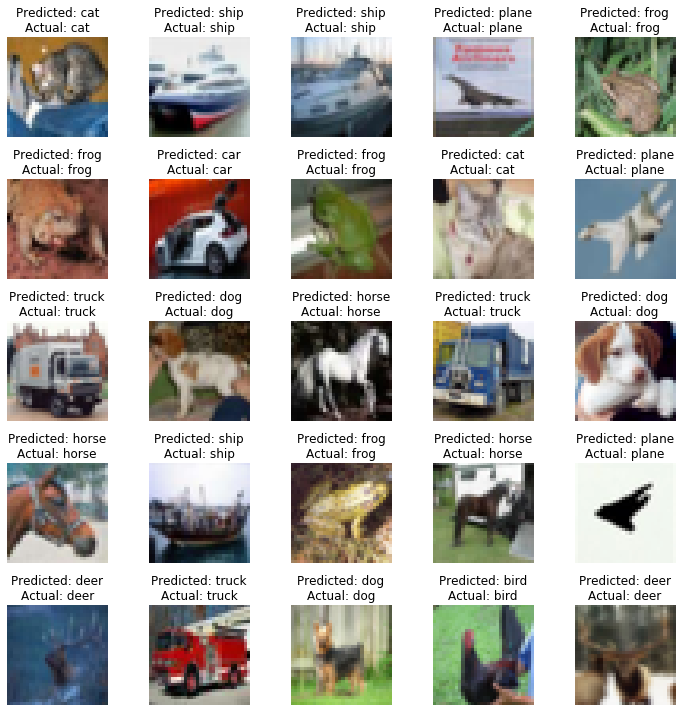

In [19]:
## correct images
plot_images(correct_imgs, classes, "Model_Quiz_correct_imgs.png")

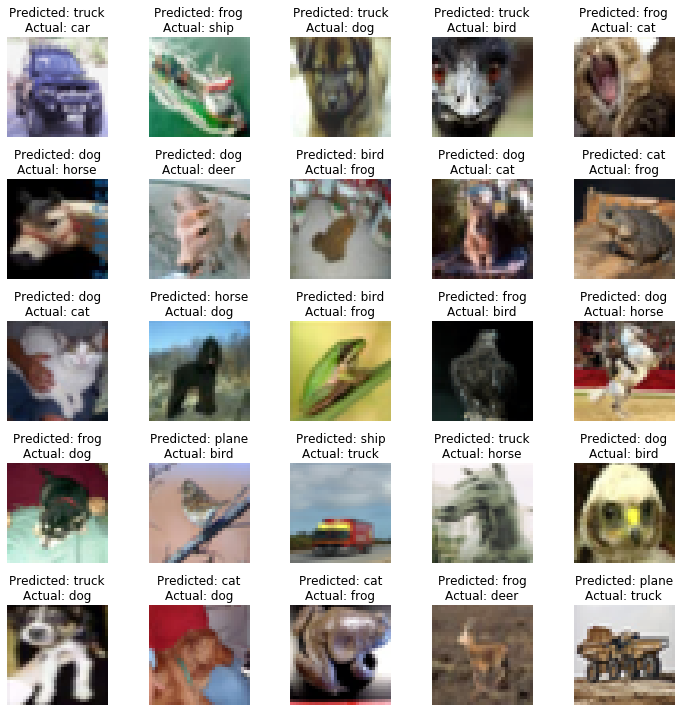

In [20]:
plot_images(misclassified_imgs, classes, "model_quiz_misclassified_imgs.png")

In [21]:
from accuracy_check import check_accuracy     
check_accuracy(testloader,device,model)

Accuracy of the network on the 10000 test images: 81 %


81.64